In [1]:
import nltk
from nltk.translate.bleu_score import sentence_bleu, corpus_bleu, modified_precision
from nltk.metrics import scores
import chainer.computational_graph as c
%matplotlib inline

In [2]:
from nmt_run import *

fisher + callhome sp/es - en configuration
--------------------------------------------------
loading info_dict from=./callhome_fbank_out/info.dict


 37%|███▋      | 51615/138708 [00:00<00:00, 516145.57it/s]

--------------------------------------------------
creating buckets for: fisher_dev
creating buckets for key: sp
creating buckets for: fisher_dev2
creating buckets for key: sp
creating buckets for: fisher_test
creating buckets for key: sp
creating buckets for: fisher_train
creating buckets for key: sp


100%|██████████| 14284/14284 [00:00<00:00, 536937.07it/s]


creating buckets for: callhome_devtest
creating buckets for key: sp
creating buckets for: callhome_evltest
creating buckets for key: sp
creating buckets for: callhome_train
creating buckets for key: sp
--------------------------------------------------
saving info dict in: ./callhome_fbank_out/buckets_sp.dict
all done ...
--------------------------------------------------
showing buckets for category: fisher_dev
number of buckets=20, width of each bucket=96
index | width | num   
    0 |     0 |    428
    1 |    96 |    978
    2 |   192 |    566
    3 |   288 |    459
    4 |   384 |    337
    5 |   480 |    233
    6 |   576 |    230
    7 |   672 |    179
    8 |   768 |    149
    9 |   864 |    142
   10 |   960 |     79
   11 |  1056 |     85
   12 |  1152 |     45
   13 |  1248 |     28
   14 |  1344 |     24
   15 |  1440 |      7
   16 |  1536 |      5
   17 |  1632 |      1
   18 |  1728 |      1
   19 |  1824 |      1
--------------------------------------------------
show

/afs/inf.ed.ac.uk/group/project/lowres/work/anaconda3/envs/chainer2/lib/python3.6/site-packages/chainer/utils/experimental.py:104: FutureWarning: chainer.links.normalization.layer_normalization.py is experimental. The interface can change in the future.
  FutureWarning)


using ADAM optimizer


In [3]:
model_files = [f for f in os.listdir(os.path.dirname(model_fil))
                   if os.path.basename(model_fil).replace('.model','') in f]
# print(model_files)

In [4]:
max_model_fil = max(model_files, key=lambda s: int(s.split('_')[-1].split('.')[0]))

In [5]:
max_model_fil

'seq2seq_sen-138819_hwy0-dec4_emb-256-h-256__sp_en_w_gru_drpt-0.3_noise-0_l2-0.000100_32_32_2_2_2DCNN_BN_LN_enc-4_92.model'

In [6]:
last_epoch = check_model()

--------------------------------------------------------------------------------
model found = 
fsh_fbank/seq2seq_sen-138819_hwy0-dec4_emb-256-h-256__sp_en_w_gru_drpt-0.3_noise-0_l2-0.000100_32_32_2_2_2DCNN_BN_LN_enc-4_92.model
loading ...
finished loading ..


In [7]:
log_dev_fil_name

'fsh_fbank/dev_sen-138819_hwy0-dec4_emb-256-h-256__sp_en_w_gru_drpt-0.3_noise-0_l2-0.000100_32_32_2_2_2DCNN_BN_LN_enc-4.log'

In [8]:
log_train = np.loadtxt(log_train_fil_name, delimiter=',', skiprows=False).transpose()
log_test = np.loadtxt(log_dev_fil_name, delimiter=',', skiprows=0).transpose()

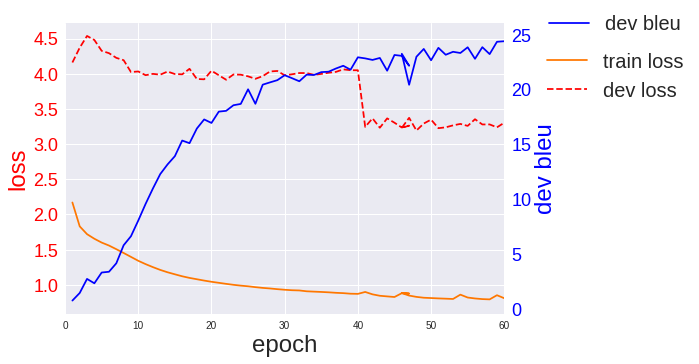

In [9]:
fig, ax1 = plt.subplots()
fig.set_size_inches(8,5)
ax1.plot(log_train[0], log_train[1], color='#ff7700')
ax1.plot(log_test[0], log_test[1], 'r--')
ax1.set_xlabel('epoch', size=24)
ax1.set_ylabel('loss', color='r', size=24)
for tl in ax1.get_yticklabels():
    tl.set_color('r')
    tl.set_fontsize(18)
plt.legend(['train loss', 'dev loss'], bbox_to_anchor=(1.45, 0.96), framealpha=0, fontsize=20)    
ax2 = ax1.twinx()
ax2.plot(log_test[0], log_test[2]*100, 'b-')
ax2.set_xlabel('iteration')
ax2.set_ylabel('dev bleu', color='b', size=24)
ax1.set_xlim(0, 60)
for tl in ax2.get_yticklabels():
    tl.set_color('b')
    tl.set_fontsize(18) 
# plt.legend(['dev bleu'], bbox_to_anchor=(1.44, 1.04), framealpha=0, fontsize=20)
plt.legend(['dev bleu'], bbox_to_anchor=(1.06, 0.9), framealpha=0, fontsize=20)
plt.grid(False)
plt.tight_layout()

In [10]:
import nltk.translate.bleu_score

In [ ]:
def display_words(m_dict, v_dict, preds, utts, dec_key, min_len=0, max_len=MAX_EN_LEN):
    es_ref = []
    en_ref = []
    for u in utts:
        es_ref.append(" ".join([w.decode() for w in m_dict[u]['es_w']]))
        if type(m_dict[u][dec_key]) == list:
            en_ref.append(" ".join([w.decode() for w in m_dict[u]['en_w']]))
        else:
            en_ref.append(" ".join([w.decode() for w in m_dict[u]['en_w'][0]]))

    en_pred = []
    join_str = ' ' if dec_key.endswith('_w') else ''

    for p in preds:
        t_str = join_str.join([v_dict['i2w'][i].decode() for i in p])
        t_str = t_str[:t_str.find('_EOS')]
        en_pred.append(t_str)

    for u, es, en, p in zip(utts, es_ref, en_ref, en_pred):
        if len(en.split(" ")) >= min_len and len(en.split(" ")) <= max_len:
            # for reference, 1st word is GO_ID, no need to display
            print("Utterance: {0:s}".format(u))
            display_pp = PrettyTable(["cat","sent"], hrules=True)
            display_pp.align = "l"
            display_pp.header = False
            display_pp.add_row(["es ref", textwrap.fill(es,50)])
            display_pp.add_row(["en ref", textwrap.fill(en,50)])
            display_pp.add_row(["en pred", textwrap.fill(p,50)])

            print(display_pp)

### Fisher dev

In [11]:
key='fisher_dev'
train=False
m_dict = map_dict[key]
v_dict = vocab_dict[dec_key]
n=len(map_dict[key])
BATCH_SIZE = 100

In [12]:
cat_speech_path = os.path.join(out_path, key)

In [13]:
print("-"*80)
print("EPOCH = {0:d}".format(last_epoch+1))
fsh_pred_sents, fsh_utts, loss = feed_model(map_dict[key],
                  b_dict=bucket_dict[key],
                  vocab_dict=vocab_dict,
                  batch_size=BATCH_SIZE,
                  x_key=enc_key,
                  y_key=dec_key,
                  train=train,
                  cat_speech_path=cat_speech_path, use_y=True)

print("{0:s} {1:s} mean loss={2:.4f}".format("*" * 10,
                                    "train" if train else "dev",
                                    loss))
print("-")
print("-"*80)

  0%|          | 0/3977 [00:00<?, ?it/s]

--------------------------------------------------------------------------------
EPOCH = 93


b=2,l=0.73,avg=2.36: 100%|██████████| 3977/3977 [03:31<00:00, 11.88it/s]   

********** dev mean loss=2.3576
-
--------------------------------------------------------------------------------


In [50]:
min_len, max_len= 5, 6

In [51]:
display_words(m_dict, v_dict, fsh_pred_sents, fsh_utts, dec_key, min_len=min_len, max_len=max_len)

min length=5, max length=6
Utterance: 20051009_182032_217_fsp-A-3
+---------+-----------------------------+
| es ref  | eh estoy en ah pennsylvania |
+---------+-----------------------------+
| en ref  | ah i m in ah pennsylvania   |
+---------+-----------------------------+
| en pred | eh i m in the in the        |
+---------+-----------------------------+
Utterance: 20051009_182032_217_fsp-B-9
+---------+--------------------------------+
| es ref  | oh ¿sabes el tema de hoy       |
+---------+--------------------------------+
| en ref  | oh do you know the topic today |
+---------+--------------------------------+
| en pred | oh you know today s topic      |
+---------+--------------------------------+
Utterance: 20051019_210146_289_fsp-A-81
+---------+----------------------------+
| es ref  | ¿qué son olotas olas o que |
+---------+----------------------------+
| en ref  | big waves                  |
+---------+----------------------------+
| en pred | maybe are are olga hello   |


Utterance: 20051018_210744_280_fsp-B-88
+---------+-------------------------------+
| es ref  | pero no es una vida lujosa    |
+---------+-------------------------------+
| en ref  | but it s not a life of luxury |
+---------+-------------------------------+
| en pred | but some video life           |
+---------+-------------------------------+
Utterance: 20051018_210744_280_fsp-A-63
+---------+--------------------------+
| es ref  | si yo vive en nueva york |
+---------+--------------------------+
| en ref  | yes i live in new york   |
+---------+--------------------------+
| en pred | yes i live in new york   |
+---------+--------------------------+
Utterance: 20051018_210744_280_fsp-A-5
+---------+-------------------------+
| es ref  | oh y mi nueva york      |
+---------+-------------------------+
| en ref  | oh and i new york       |
+---------+-------------------------+
| en pred | oh my daughter new york |
+---------+-------------------------+
Utterance: 20051023_232057_325_fsp

In [52]:
def display_words_latex(m_dict, v_dict, preds, utts, dec_key, min_len=0, max_len=2*MAX_EN_LEN):
    print("min length={0:d}, max length={1:d}".format(min_len, max_len))
    es_ref = []
    en_ref = []
    for u in utts:
        es_ref.append(" ".join([w.decode() for w in m_dict[u]['es_w']]))
        if type(m_dict[u][dec_key]) == list:
            en_ref.append(" ".join([w.decode() for w in m_dict[u]['en_w']]))
        else:
            en_ref.append(" ".join([w.decode() for w in m_dict[u]['en_w'][0]]))

    en_pred = []
    join_str = ' ' if dec_key.endswith('_w') else ''

    for p in preds:
        t_str = join_str.join([v_dict['i2w'][i].decode() for i in p])
        t_str = t_str[:t_str.find('_EOS')]
        en_pred.append(t_str)

    total_matching_len = 0

    for u, es, en, p in zip(utts, es_ref, en_ref, en_pred):
        if len(es.split(" ")) >= min_len and len(es.split(" ")) <= max_len:
            total_matching_len += 1
            # for reference, 1st word is GO_ID, no need to display
            print("Utterance: {0:s}".format(u))
            print("{0:d} & {1:s} & {2:s} & {3:s} \\\\".format(total_matching_len, es, en, p))

    print("total utts matching length filters={0:d}".format(total_matching_len))

In [53]:
display_words_latex(m_dict, v_dict, fsh_pred_sents, fsh_utts, dec_key, min_len=min_len, max_len=max_len)

min length=5, max length=6
Utterance: 20051009_182032_217_fsp-A-3
1 & eh estoy en ah pennsylvania & ah i m in ah pennsylvania & eh i m in the in the  \\
Utterance: 20051009_182032_217_fsp-B-9
2 & oh ¿sabes el tema de hoy & oh do you know the topic today & oh you know today s topic  \\
Utterance: 20051019_210146_289_fsp-A-81
3 & ¿qué son olotas olas o que & big waves & maybe are are olga hello  \\
Utterance: 20051023_232057_325_fsp-B-86
4 & eso sí no echo de menos & well yes i don t really miss & yes that s the last eight brothers  \\
Utterance: 20051026_180724_341_fsp-A-17
5 & so ah eso también fue problema & then ah that was a problem too & so ah that s also problem  \\
Utterance: 20051019_210146_289_fsp-B-86
6 & porque florida es el atlántico & because florida is the atlantic & because florida florida is atlantic atlantic  \\
Utterance: 20051025_212334_337_fsp-B-39
7 & ya ajá y el tuyo ¿javier & there aja and yours javier & oh bessy yeah and you studied  \\
Utterance: 20051018_210744

In [27]:
b, h, r = calc_bleu(m_dict, v_dict, fsh_pred_sents[:n], fsh_utts[:n], dec_key, min_len=min_len, max_len=max_len)

print("BLEU score on: {0:s} = {1:.2f}".format(key, b * 100))

print("-"*60)

all_weights=[(1.,0.,0.,0.),
             (0.,1.,0.,0.),
             (0.,0.,1.,0.),
             (0.,0.,0.,1.),
             (1./2,1./2,0.,0.),
             (1./3,1./3,1./3,0.),
             (.25,.25,.25,.25)]

100%|██████████| 3977/3977 [00:00<00:00, 40936.26it/s]

min length=0, max length=100


total utts matching length filters=3977
BLEU score on: fisher_dev = 23.89
------------------------------------------------------------


In [28]:
smooth_fun = nltk.translate.bleu_score.SmoothingFunction()

In [29]:
print("{0:>20s} | {1:20s}".format("bleu score (0-100)", "uni-bi-tri-quad"))
for weights in all_weights:
    b = corpus_bleu(r, h, weights=weights, smoothing_function=smooth_fun.method2)
    print("{0:20.2f} | {1:20s}".format(b * 100, "-".join(map("{0:.2f}".format, weights))))

  bleu score (0-100) | uni-bi-tri-quad     
               60.48 | 1.00-0.00-0.00-0.00 
               32.55 | 0.00-1.00-0.00-0.00 
               17.47 | 0.00-0.00-1.00-0.00 
                9.47 | 0.00-0.00-0.00-1.00 
               44.37 | 0.50-0.50-0.00-0.00 
               32.52 | 0.33-0.33-0.33-0.00 
               23.89 | 0.25-0.25-0.25-0.25 


In [30]:
_, _ = corpus_precision_recall(r, h)

min length=0, max length=240
total utts=3977
metric     |   1-gram |   2-gram|   3-gram |   4-gram
------------------------------------------------------
precision  |    60.75 |    32.69|    17.54 |     9.51
recall     |    59.01 |    31.75|    17.03 |     9.23


### Callhome dev

In [ ]:
key='callhome_devtest'
train=False
m_dict = map_dict[key]
v_dict = vocab_dict[dec_key]
n=len(map_dict[key])
BATCH_SIZE = 100

In [ ]:
cat_speech_path = os.path.join(out_path, key)

In [ ]:
print("-"*80)
print("EPOCH = {0:d}".format(last_epoch+1))
pred_sents, utts, loss = feed_model(map_dict[key],
                  b_dict=bucket_dict[key],
                  vocab_dict=vocab_dict,
                  batch_size=BATCH_SIZE,
                  x_key=enc_key,
                  y_key=dec_key,
                  train=train,
                  cat_speech_path=cat_speech_path, use_y=True)

print("{0:s} {1:s} mean loss={2:.4f}".format("*" * 10,
                                    "train" if train else "dev",
                                    loss))
print("-")
print("-"*80)

In [ ]:
display_words(m_dict, v_dict, pred_sents[:50], utts[:50], dec_key)

In [ ]:
b, h, r = calc_bleu(m_dict, v_dict, pred_sents[:n], utts[:n], dec_key)

print("BLEU score on: {0:s} = {1:.2f}".format(key, b * 100))

print("-"*60)

all_weights=[(1.,0.,0.,0.),
             (0.,1.,0.,0.),
             (0.,0.,1.,0.),
             (0.,0.,0.,1.),
             (1./2,1./2,0.,0.),
             (1./3,1./3,1./3,0.),
             (.25,.25,.25,.25)]

In [ ]:
smooth_fun = nltk.translate.bleu_score.SmoothingFunction()

In [ ]:
print("{0:>20s} | {1:20s}".format("bleu score (0-100)", "uni-bi-tri-quad"))
for weights in all_weights:
    b = corpus_bleu(r, h, weights=weights, smoothing_function=smooth_fun.method2)
    print("{0:20.2f} | {1:20s}".format(b * 100, "-".join(map("{0:.2f}".format, weights))))

In [ ]:
_, _ = corpus_precision_recall(r, h)

### Test code

In [ ]:
# test_ref = [["ha ha lol hue".split()], ["ha ha ja ha".split()], ["ha ha ja ha".split()]]
# test_h = ["lol ja".split(), "ha he".split(), "ha ja".split()]
# _, _ = corpus_precision_recall(test_ref, test_h)